# Data Loading

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load your dataset into a DataFrame
df = pd.read_csv('C://Users//Chee Xuan Yang//SIT//y2_tri2//machine_learning//TampinesResaleFlat_with_LatLong_with_Features.csv')

# Data Inspection

In [505]:
df.shape

(13363, 22)

In [506]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'Full Address', 'Latitude',
       'Longitude', 'nearest_bus_stop_distance', 'nearest_mrt_distance',
       'nearest_mall_distance', 'nearest_school_distance', 'bus_stop_count',
       'mrt_count', 'mall_count', 'school_count'],
      dtype='object')

In [507]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,Latitude,Longitude,nearest_bus_stop_distance,nearest_mrt_distance,nearest_mall_distance,nearest_school_distance,bus_stop_count,mrt_count,mall_count,school_count
0,2017-01,TAMPINES,2 ROOM,299A,TAMPINES ST 22,01 TO 03,45,Model A,2012,94 years 02 months,...,1.350005,103.953938,74.413446,NaN,NaN,308.671041,13.0,0.0,0.0,4.0
1,2017-01,TAMPINES,3 ROOM,403,TAMPINES ST 41,01 TO 03,60,Improved,1985,67 years 09 months,...,1.357512,103.944918,72.814515,457.922913,369.959209,465.132319,15.0,1.0,2.0,4.0
2,2017-01,TAMPINES,3 ROOM,802,TAMPINES AVE 4,04 TO 06,68,New Generation,1984,66 years 05 months,...,1.346084,103.938034,120.999263,NaN,NaN,203.682444,12.0,0.0,0.0,4.0
3,2017-01,TAMPINES,3 ROOM,410,TAMPINES ST 41,01 TO 03,69,Improved,1985,67 years 08 months,...,1.358778,103.946271,114.172862,NaN,526.408805,315.694223,12.0,0.0,1.0,4.0
4,2017-01,TAMPINES,3 ROOM,462,TAMPINES ST 44,07 TO 09,64,Simplified,1987,69 years 06 months,...,1.359013,103.955111,93.841568,NaN,NaN,229.786957,20.0,0.0,0.0,2.0


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13363 entries, 0 to 13362
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      13363 non-null  object 
 1   town                       13363 non-null  object 
 2   flat_type                  13363 non-null  object 
 3   block                      13363 non-null  object 
 4   street_name                13363 non-null  object 
 5   storey_range               13363 non-null  object 
 6   floor_area_sqm             13363 non-null  int64  
 7   flat_model                 13363 non-null  object 
 8   lease_commence_date        13363 non-null  int64  
 9   remaining_lease            13363 non-null  object 
 10  resale_price               13363 non-null  int64  
 11  Full Address               13363 non-null  object 
 12  Latitude                   13363 non-null  float64
 13  Longitude                  13363 non-null  flo

In [509]:
df.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
remaining_lease                  0
resale_price                     0
Full Address                     0
Latitude                         0
Longitude                        0
nearest_bus_stop_distance        4
nearest_mrt_distance          7363
nearest_mall_distance        10345
nearest_school_distance        400
bus_stop_count                   4
mrt_count                        4
mall_count                       4
school_count                     4
dtype: int64

# Data Cleaning

In [510]:
# Replacing NaN values with 0 for the count variables (bus_stop_count, mrt_count, mall_count, school_count)
df['bus_stop_count'] = df['bus_stop_count'].fillna(0)
df['mrt_count'] = df['mrt_count'].fillna(0)
df['mall_count'] = df['mall_count'].fillna(0)
df['school_count'] = df['school_count'].fillna(0)

# Check for missing values again to ensure the counts are handled
df.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
remaining_lease                  0
resale_price                     0
Full Address                     0
Latitude                         0
Longitude                        0
nearest_bus_stop_distance        4
nearest_mrt_distance          7363
nearest_mall_distance        10345
nearest_school_distance        400
bus_stop_count                   0
mrt_count                        0
mall_count                       0
school_count                     0
dtype: int64

In [511]:
df['nearest_mrt_distance'].fillna(550, inplace=True)
df['nearest_mall_distance'].fillna(550, inplace=True)
df['nearest_bus_stop_distance'].fillna(550, inplace=True)
df['nearest_school_distance'].fillna(550, inplace=True)

# Check for missing values again
df.isnull().sum()

C:\Users\Chee Xuan Yang\AppData\Local\Temp\ipykernel_25232\2829534340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nearest_mrt_distance'].fillna(550, inplace=True)
C:\Users\Chee Xuan Yang\AppData\Local\Temp\ipykernel_25232\2829534340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

month                        0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
remaining_lease              0
resale_price                 0
Full Address                 0
Latitude                     0
Longitude                    0
nearest_bus_stop_distance    0
nearest_mrt_distance         0
nearest_mall_distance        0
nearest_school_distance      0
bus_stop_count               0
mrt_count                    0
mall_count                   0
school_count                 0
dtype: int64

In [512]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

Missing Values:
 Series([], dtype: int64)

Number of duplicate rows: 16


In [513]:
# Remove duplicates
df = df.drop_duplicates()

# Confirm that duplicates are removed
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

Number of duplicate rows after cleaning: 0


In [514]:
#Split the month column into two separate columns: year and month
df['year'] = df['month'].apply(lambda x: int(x.split('-')[0]))
df['month'] = df['month'].apply(lambda x: int(x.split('-')[1]))

In [515]:
def convert_to_months(lease_str):
    # Check if the lease string includes a months portion
    if "months" in lease_str:
        # Expected format: "<years> years <months> months"
        years = int(lease_str.split(" years ")[0])
        months = int(lease_str.split(" years ")[1].split(" months")[0])
    else:
        # Format with only years: "<years> years"
        years = int(lease_str.split(" years")[0])
        months = 0
    return years * 12 + months

df['remaining_lease_months'] = df['remaining_lease'].apply(convert_to_months)
df.drop(columns=['remaining_lease'], inplace=True)

In [516]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['flat_type'], prefix='flat_type')

# Drop the original 'flat_type' column
df.drop(columns=['flat_type'], inplace=True, errors='ignore')

# Check the result
print(df.head())

   month      town block     street_name storey_range  floor_area_sqm  \
0      1  TAMPINES  299A  TAMPINES ST 22     01 TO 03              45   
1      1  TAMPINES   403  TAMPINES ST 41     01 TO 03              60   
2      1  TAMPINES   802  TAMPINES AVE 4     04 TO 06              68   
3      1  TAMPINES   410  TAMPINES ST 41     01 TO 03              69   
4      1  TAMPINES   462  TAMPINES ST 44     07 TO 09              64   

       flat_model  lease_commence_date  resale_price         Full Address  \
0         Model A                 2012        250000  299A TAMPINES ST 22   
1        Improved                 1985        270000   403 TAMPINES ST 41   
2  New Generation                 1984        295000   802 TAMPINES AVE 4   
3        Improved                 1985        300000   410 TAMPINES ST 41   
4      Simplified                 1987        305000   462 TAMPINES ST 44   

   ...  mall_count  school_count  year  remaining_lease_months  \
0  ...         0.0           4.0

In [517]:
# Apply One-Hot Encoding to 'street_name'
df = pd.get_dummies(df, columns=['street_name'], drop_first=True)

# Drop the original 'flat_type' column
df.drop(columns=['street_name'], inplace=True, errors='ignore')

# Check the result
print(df.head())

   month      town block storey_range  floor_area_sqm      flat_model  \
0      1  TAMPINES  299A     01 TO 03              45         Model A   
1      1  TAMPINES   403     01 TO 03              60        Improved   
2      1  TAMPINES   802     04 TO 06              68  New Generation   
3      1  TAMPINES   410     01 TO 03              69        Improved   
4      1  TAMPINES   462     07 TO 09              64      Simplified   

   lease_commence_date  resale_price         Full Address  Latitude  ...  \
0                 2012        250000  299A TAMPINES ST 22  1.350005  ...   
1                 1985        270000   403 TAMPINES ST 41  1.357512  ...   
2                 1984        295000   802 TAMPINES AVE 4  1.346084  ...   
3                 1985        300000   410 TAMPINES ST 41  1.358778  ...   
4                 1987        305000   462 TAMPINES ST 44  1.359013  ...   

   street_name_TAMPINES ST 45  street_name_TAMPINES ST 61  \
0                       False              

In [518]:
# Apply One-Hot Encoding to 'street_name'
df = pd.get_dummies(df, columns=['flat_model'], drop_first=True)

# Drop the original 'flat_type' column
df.drop(columns=['flat_model'], inplace=True, errors='ignore')

# Check the result
print(df.head())

   month      town block storey_range  floor_area_sqm  lease_commence_date  \
0      1  TAMPINES  299A     01 TO 03              45                 2012   
1      1  TAMPINES   403     01 TO 03              60                 1985   
2      1  TAMPINES   802     04 TO 06              68                 1984   
3      1  TAMPINES   410     01 TO 03              69                 1985   
4      1  TAMPINES   462     07 TO 09              64                 1987   

   resale_price         Full Address  Latitude   Longitude  ...  \
0        250000  299A TAMPINES ST 22  1.350005  103.953938  ...   
1        270000   403 TAMPINES ST 41  1.357512  103.944918  ...   
2        295000   802 TAMPINES AVE 4  1.346084  103.938034  ...   
3        300000   410 TAMPINES ST 41  1.358778  103.946271  ...   
4        305000   462 TAMPINES ST 44  1.359013  103.955111  ...   

   flat_model_Apartment  flat_model_DBSS  flat_model_Improved  \
0                 False            False                False  

In [519]:
def convert_storey_range(range_str):
    # Extract numbers from strings like "01 TO 03"
    low, high = map(int, range_str.replace(' TO ', ' ').split())
    return (low + high) / 2

# Convert storey_range to average floor level
df['storey_level'] = df['storey_range'].apply(convert_storey_range)
df.drop(columns=['storey_range'], inplace=True)  # Remove if not needed

In [520]:
# Drop the original 'flat_type' column
df.drop(columns=['town'], inplace=True, errors='ignore')

In [521]:
# Drop the original 'flat_type' column
df.drop(columns=['Full Address'], inplace=True, errors='ignore')

# Check the result
print(df.head())

   month block  floor_area_sqm  lease_commence_date  resale_price  Latitude  \
0      1  299A              45                 2012        250000  1.350005   
1      1   403              60                 1985        270000  1.357512   
2      1   802              68                 1984        295000  1.346084   
3      1   410              69                 1985        300000  1.358778   
4      1   462              64                 1987        305000  1.359013   

    Longitude  nearest_bus_stop_distance  nearest_mrt_distance  \
0  103.953938                  74.413446            550.000000   
1  103.944918                  72.814515            457.922913   
2  103.938034                 120.999263            550.000000   
3  103.946271                 114.172862            550.000000   
4  103.955111                  93.841568            550.000000   

   nearest_mall_distance  ...  flat_model_DBSS  flat_model_Improved  \
0             550.000000  ...            False           

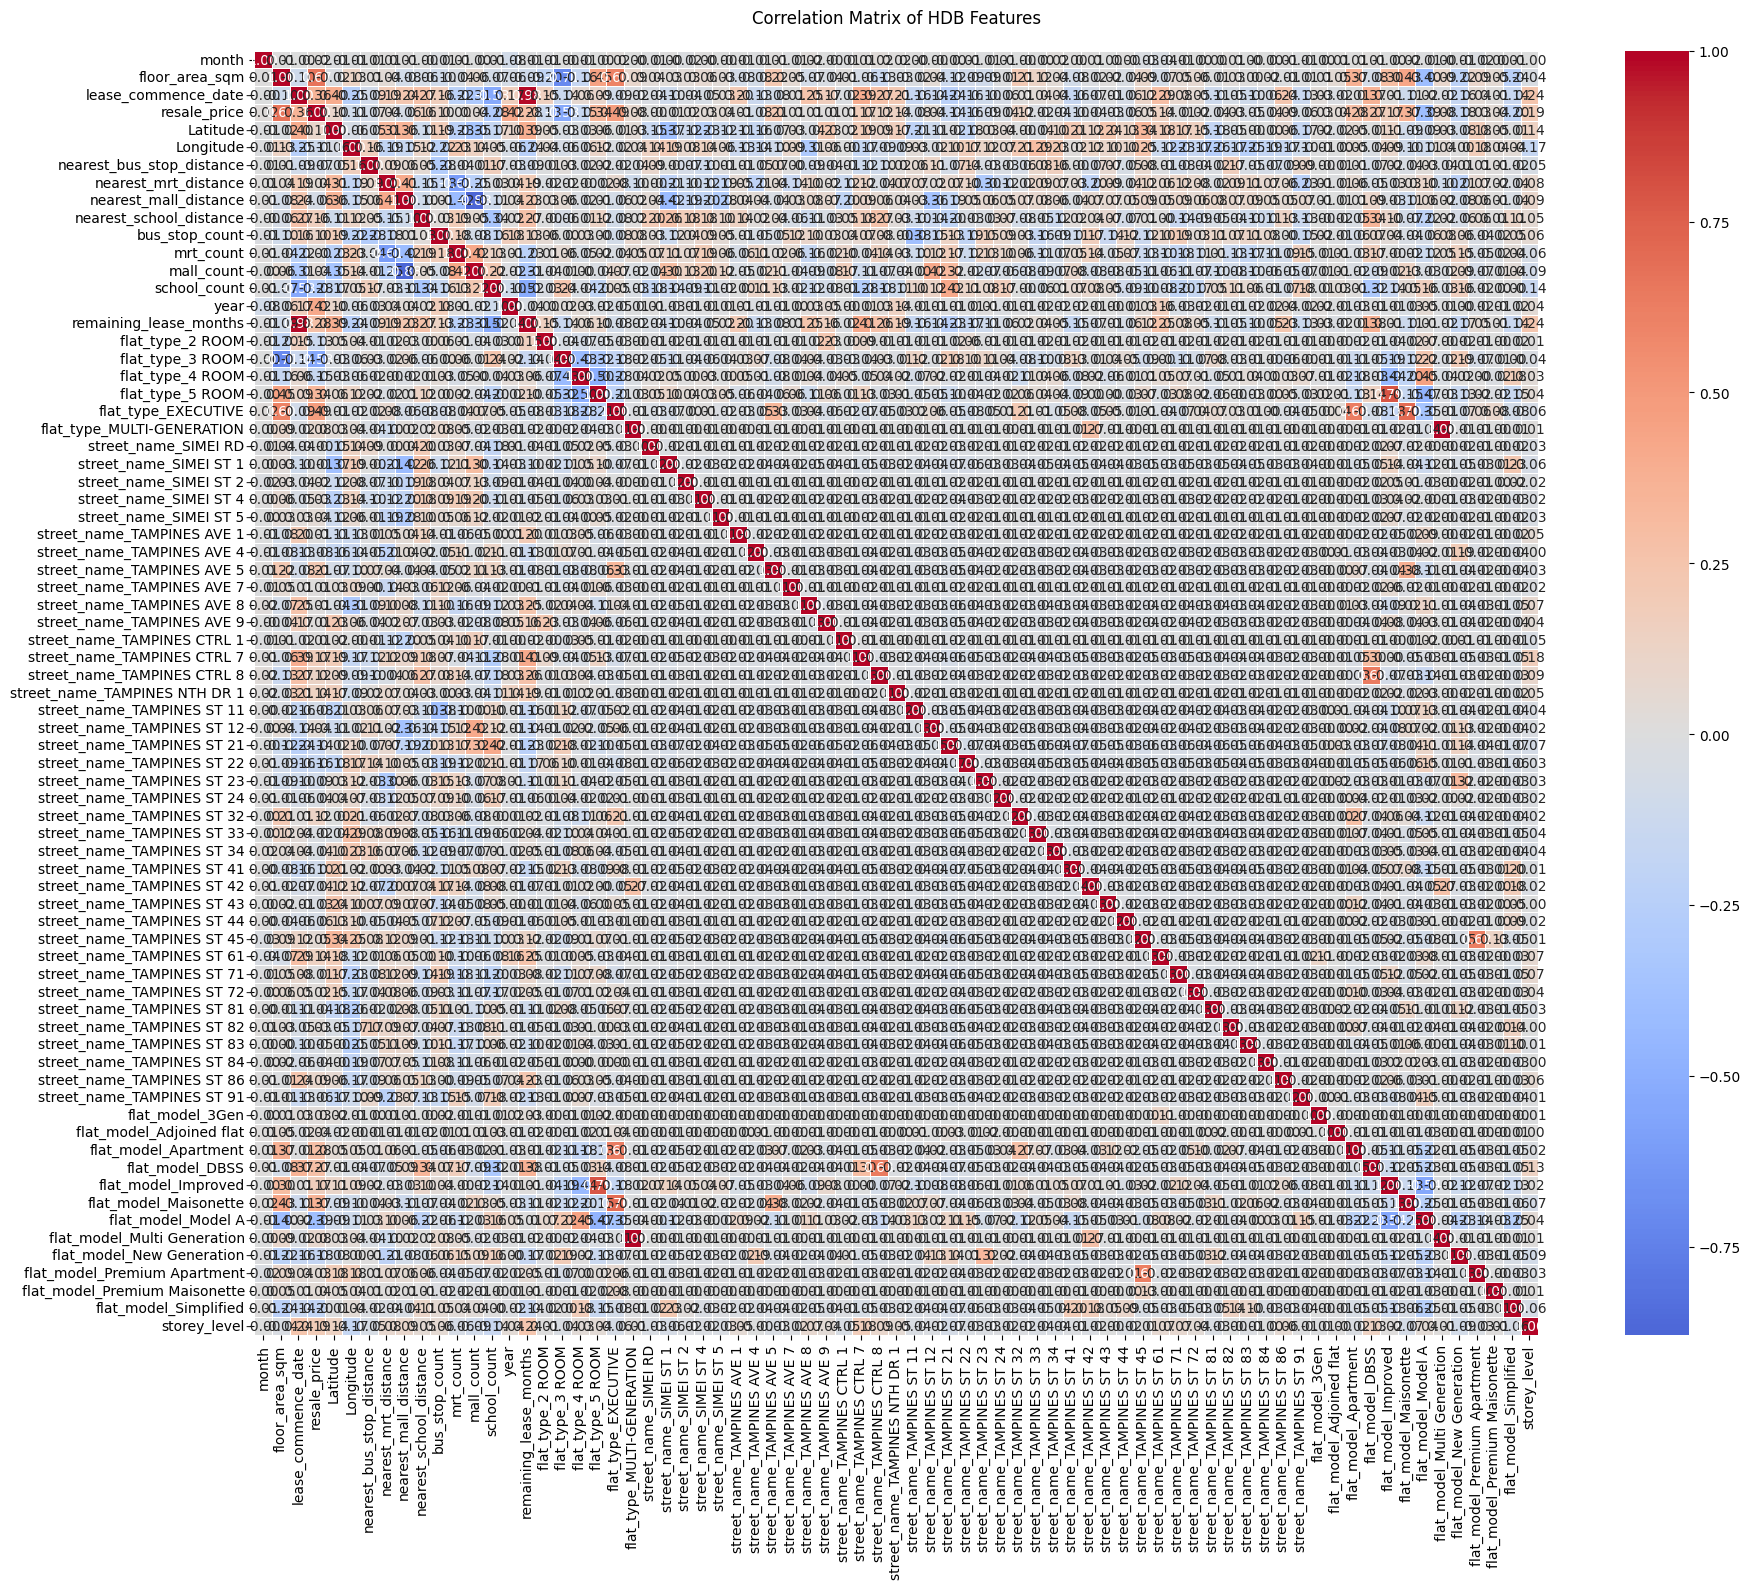


Top 10 Features Positively Correlated with Resale Price:
floor_area_sqm                0.668816
flat_type_EXECUTIVE           0.486090
year                          0.416045
flat_model_Maisonette         0.368317
lease_commence_date           0.359274
flat_type_5 ROOM              0.337620
flat_model_Apartment          0.281952
remaining_lease_months        0.276294
flat_model_DBSS               0.273695
street_name_TAMPINES AVE 5    0.210232
Name: resale_price, dtype: float64

Bottom 5 Features Negatively Correlated with Resale Price:
flat_model_New Generation   -0.181210
flat_model_Simplified       -0.195809
school_count                -0.284478
flat_model_Model A          -0.391439
flat_type_3 ROOM            -0.530748
Name: resale_price, dtype: float64

Number of features in correlation analysis: 73


In [522]:
# Drop non-numeric columns
df_numeric = df.drop(['block'], axis=1)

# Create correlation matrix
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Create a heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format correlation values to 2 decimal places
            square=True,  # Make cells square
            linewidths=0.5)  # Add lines between cells

plt.title('Correlation Matrix of HDB Features', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Let's also look at the top correlations with resale_price
price_correlations = correlation_matrix['resale_price'].sort_values(ascending=False)
print("\nTop 10 Features Positively Correlated with Resale Price:")
print(price_correlations[1:11])  # Excluding resale_price itself

print("\nBottom 5 Features Negatively Correlated with Resale Price:")
print(price_correlations[-5:])

# Print the shape of our correlation matrix to confirm the number of features
print("\nNumber of features in correlation analysis:", len(correlation_matrix.columns))